**installation et importation des bibliothèques**

In [ ]:
pip install dash

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats
from dash import Dash, dcc, html
import plotly.express as px
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [2]:
# Charger les données des retards de vols
df = pd.read_csv('airlines_review.csv')
# Aperçu des données
df.head()

,Airlines,Name,Location,Date Published,Text Content,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Recommended,Ground Service,Wifi & Connectivity
0,british_airways,C Hayne,2024,2024-08-15,"Not Verified | Before my flight, I was forced ...",Solo Leisure,NaN,NaN,NaN,1.0,1.0,False,NaN,NaN
1,british_airways,C Porter,2024,2024-08-12,✅ Trip Verified | British Airways at its bes...,A350,NaN,NaN,NaN,NaN,5.0,False,NaN,NaN
2,british_airways,G Jones,2024,2024-08-12,✅ Trip Verified | An excellent flight! Despite...,A320,NaN,NaN,NaN,NaN,3.0,False,NaN,NaN
3,british_airways,Edward King,2024,2024-08-11,✅ Trip Verified | I recently traveled with Bri...,A380,NaN,NaN,NaN,NaN,3.0,False,NaN,NaN
4,british_airways,N Kwok,2024,2024-08-09,✅ Trip Verified | My family and I were booke...,Family Leisure,NaN,NaN,NaN,1.0,1.0,False,NaN,NaN


In [3]:
# Afficher les noms des colonnes
print(df.columns)
df.info()

Index(['Airlines', 'Name', 'Location', 'Date Published', 'Text Content',
       'Seat Type', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Recommended',
       'Ground Service', 'Wifi & Connectivity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13590 entries, 0 to 13589
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airlines                13590 non-null  object 
 1   Name                    13590 non-null  object 
 2   Location                13590 non-null  int64  
 3   Date Published          13590 non-null  object 
 4   Text Content            13590 non-null  object 
 5   Seat Type               13590 non-null  object 
 6   Seat Comfort            3123 non-null   float64
 7   Cabin Staff Service     3124 non-null   float64
 8   Food & Beverages        3154 non-null   float64
 9   Inflight Ente

**b- pré-traitement des données**

In [4]:
# Remplir les valeurs manquantes avec des valeurs par défaut ou supprimer les lignes
df_cleaned = df.dropna(subset=['Seat Comfort', 'Cabin Staff Service'])

# Transformer la colonne 'Recommended' en binaire (1 = Yes, 0 = No)
df_cleaned['Recommended'] = df_cleaned['Recommended'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

C:\Users\pc cam\AppData\Local\Temp\ipykernel_8556\3649910990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Recommended'] = df_cleaned['Recommended'].apply(lambda x: 1 if x == 'Yes' else 0)


,Airlines,Name,Location,Date Published,Text Content,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Recommended,Ground Service,Wifi & Connectivity
0,british_airways,C Hayne,2024,2024-08-15,"Not Verified | Before my flight, I was forced ...",Solo Leisure,NaN,NaN,NaN,1.0,1.0,False,NaN,NaN
1,british_airways,C Porter,2024,2024-08-12,✅ Trip Verified | British Airways at its bes...,A350,NaN,NaN,NaN,NaN,5.0,False,NaN,NaN
2,british_airways,G Jones,2024,2024-08-12,✅ Trip Verified | An excellent flight! Despite...,A320,NaN,NaN,NaN,NaN,3.0,False,NaN,NaN
3,british_airways,Edward King,2024,2024-08-11,✅ Trip Verified | I recently traveled with Bri...,A380,NaN,NaN,NaN,NaN,3.0,False,NaN,NaN
4,british_airways,N Kwok,2024,2024-08-09,✅ Trip Verified | My family and I were booke...,Family Leisure,NaN,NaN,NaN,1.0,1.0,False,NaN,NaN


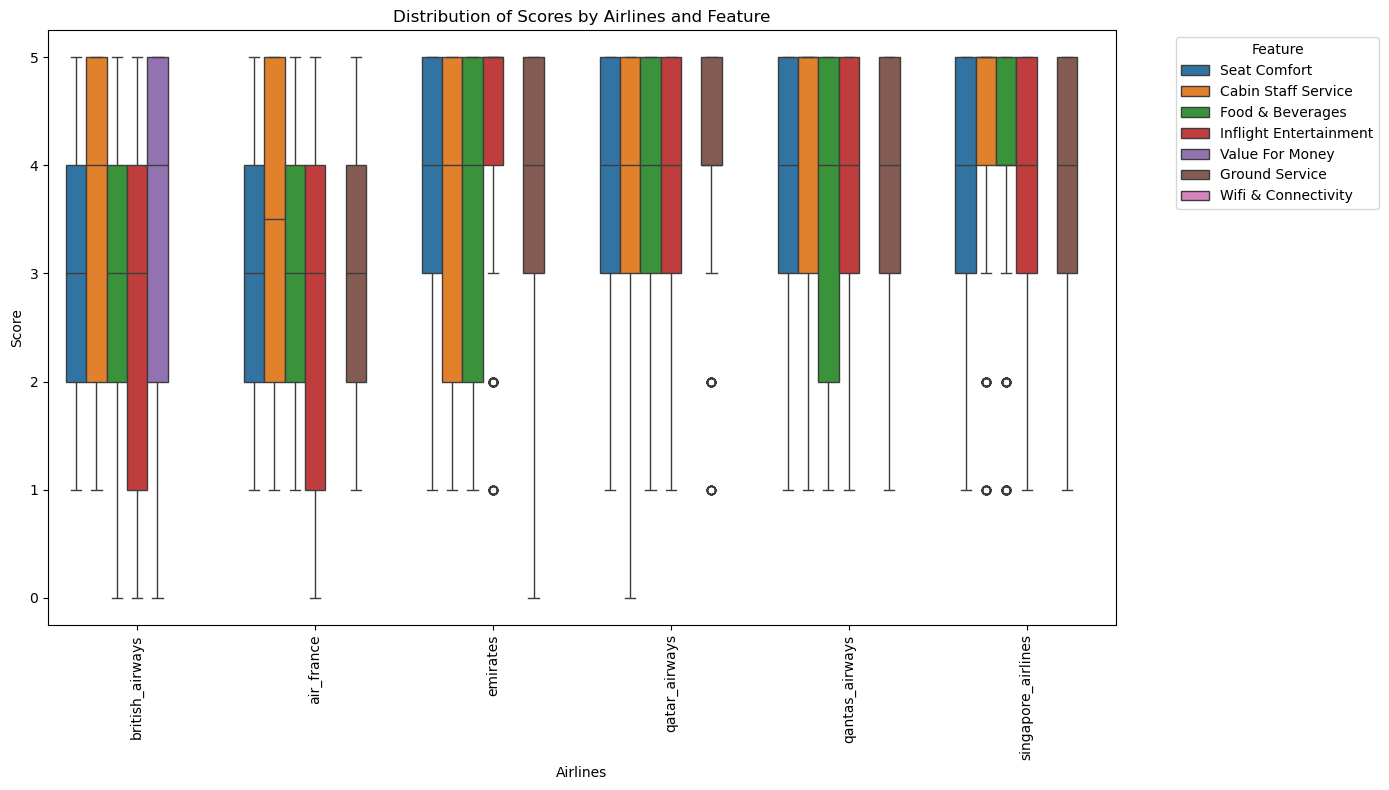

In [5]:
# Colonnes à visualiser
features = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
            'Inflight Entertainment', 'Value For Money', 'Ground Service',
            'Wifi & Connectivity']

# Reshape le DataFrame
df_melted = df_cleaned.melt(id_vars='Airlines', value_vars=features,
                            var_name='Feature', value_name='Score')

# Créez le boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Airlines', y='Score', hue='Feature', data=df_melted)
plt.title('Distribution of Scores by Airlines and Feature')
plt.xticks(rotation=90)
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajuste le layout pour éviter le chevauchement
plt.show()

**Matrice de correlation**

<function matplotlib.pyplot.show(close=None, block=None)>

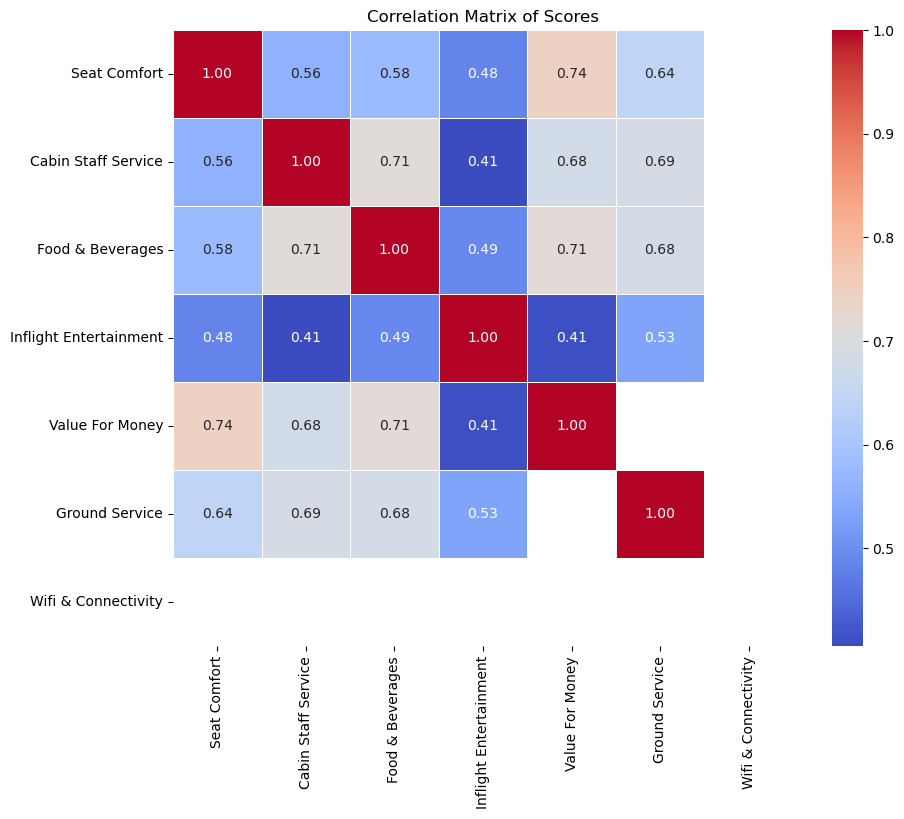

In [6]:
# Calcul de la matrice de corrélation
corr = df_cleaned[features].corr()

# Création du heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Scores')
plt.show

**Analyse des Performances par Compagnie Aérienne**

In [7]:
# Calculer les scores moyens pour chaque service
service_scores = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money', 'Ground Service', 'Wifi & Connectivity']].mean()
print(service_scores.sort_values())

Inflight Entertainment    3.051711
Value For Money           3.215517
Food & Beverages          3.412809
Seat Comfort              3.503362
Ground Service            3.518210
Wifi & Connectivity       3.525860
Cabin Staff Service       3.705506
dtype: float64


0.8706189836487714


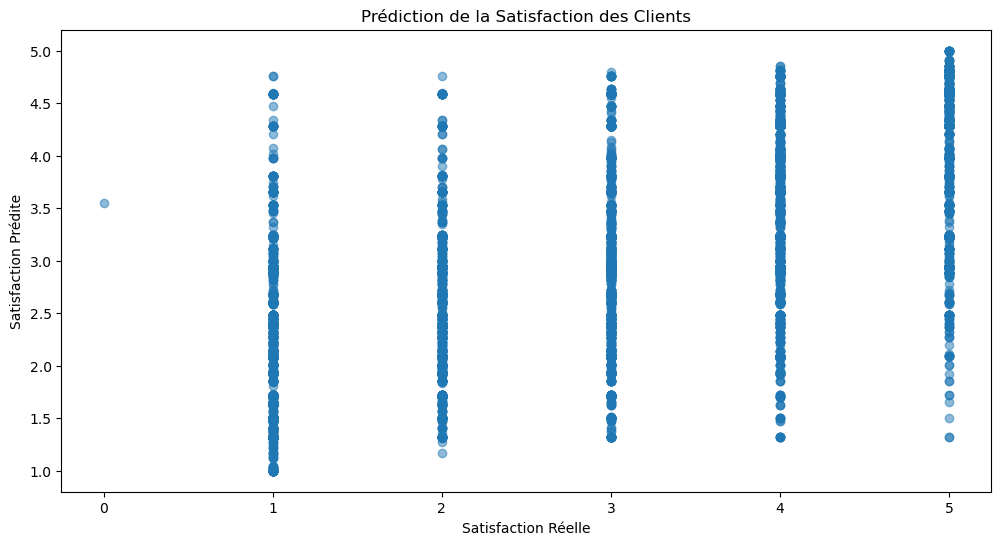

In [9]:
# Préparer les données
X = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity']].fillna(0)
y = df['Value For Money']

# Imputation des valeurs manquantes avec la médiane
imputer = SimpleImputer(strategy='median')
df['Value For Money'] = imputer.fit_transform(df[['Value For Money']])
# Modèle de prédiction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Prédictions
df['Predicted Satisfaction'] = model.predict(X)
print(mean_squared_error(y, df['Predicted Satisfaction']))

# Visualisation des prévisions
plt.figure(figsize=(12, 6))
plt.scatter(df['Value For Money'], df['Predicted Satisfaction'], alpha=0.5)
plt.xlabel('Satisfaction Réelle')
plt.ylabel('Satisfaction Prédite')
plt.title('Prédiction de la Satisfaction des Clients')
plt.show()